In [1]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score

plt.style.use('bmh')

In [3]:
data = pd.read_csv('credit_card_default.csv', index_col=0)
data.head()

,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,...,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,20000,Female,University,Married,24.0,Payment delayed 2 months,Payment delayed 2 months,Payed duly,Payed duly,Unknown,...,0,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26.0,Payed duly,Payment delayed 2 months,Unknown,Unknown,Unknown,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34.0,Unknown,Unknown,Unknown,Unknown,Unknown,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,University,Married,37.0,Unknown,Unknown,Unknown,Unknown,Unknown,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,University,Married,57.0,Payed duly,Unknown,Payed duly,Unknown,Unknown,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.dtypes

limit_bal                       int64
sex                            object
education                      object
marriage                       object
age                           float64
payment_status_sep             object
payment_status_aug             object
payment_status_jul             object
payment_status_jun             object
payment_status_may             object
payment_status_apr             object
bill_statement_sep              int64
bill_statement_aug              int64
bill_statement_jul              int64
bill_statement_jun              int64
bill_statement_may              int64
bill_statement_apr              int64
previous_payment_sep            int64
previous_payment_aug            int64
previous_payment_jul            int64
previous_payment_jun            int64
previous_payment_may            int64
previous_payment_apr            int64
default_payment_next_month      int64
dtype: object

In [5]:
data.isna().sum()

limit_bal                       0
sex                           150
education                     150
marriage                      150
age                           150
payment_status_sep              0
payment_status_aug              0
payment_status_jul              0
payment_status_jun              0
payment_status_may              0
payment_status_apr              0
bill_statement_sep              0
bill_statement_aug              0
bill_statement_jul              0
bill_statement_jun              0
bill_statement_may              0
bill_statement_apr              0
previous_payment_sep            0
previous_payment_aug            0
previous_payment_jul            0
previous_payment_jun            0
previous_payment_may            0
previous_payment_apr            0
default_payment_next_month      0
dtype: int64

In [6]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1000000.0
age,29850.0,35.49,9.22,21.0,28.00,34.0,41.00,79.0
bill_statement_sep,30000.0,51223.33,73635.86,-165580.0,3558.75,22381.5,67091.00,964511.0
bill_statement_aug,30000.0,49179.08,71173.77,-69777.0,2984.75,21200.0,64006.25,983931.0
bill_statement_jul,30000.0,47013.15,69349.39,-157264.0,2666.25,20088.5,60164.75,1664089.0
bill_statement_jun,30000.0,43262.95,64332.86,-170000.0,2326.75,19052.0,54506.00,891586.0
bill_statement_may,30000.0,40311.40,60797.16,-81334.0,1763.00,18104.5,50190.50,927171.0
bill_statement_apr,30000.0,38871.76,59554.11,-339603.0,1256.00,17071.0,49198.25,961664.0
previous_payment_sep,30000.0,5663.58,16563.28,0.0,1000.00,2100.0,5006.00,873552.0
previous_payment_aug,30000.0,5921.16,23040.87,0.0,833.00,2009.0,5000.00,1684259.0


In [7]:
data.describe(include='object').T

,count,unique,top,freq
sex,29850,2,Female,18027
education,29850,4,University,13960
marriage,29850,3,Single,15891
payment_status_sep,30000,10,Unknown,17496
payment_status_aug,30000,10,Unknown,19512
payment_status_jul,30000,10,Unknown,19849
payment_status_jun,30000,10,Unknown,20803
payment_status_may,30000,9,Unknown,21493
payment_status_apr,30000,9,Unknown,21181


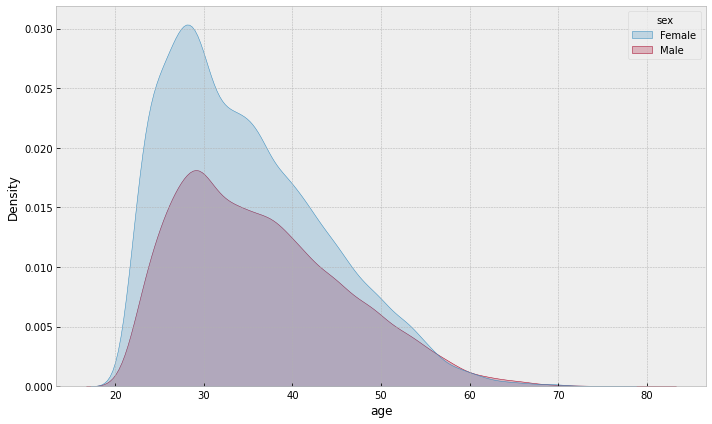

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(data=data.dropna(), x='age', hue='sex', ax=ax, fill=True)

plt.tight_layout()
plt.show()

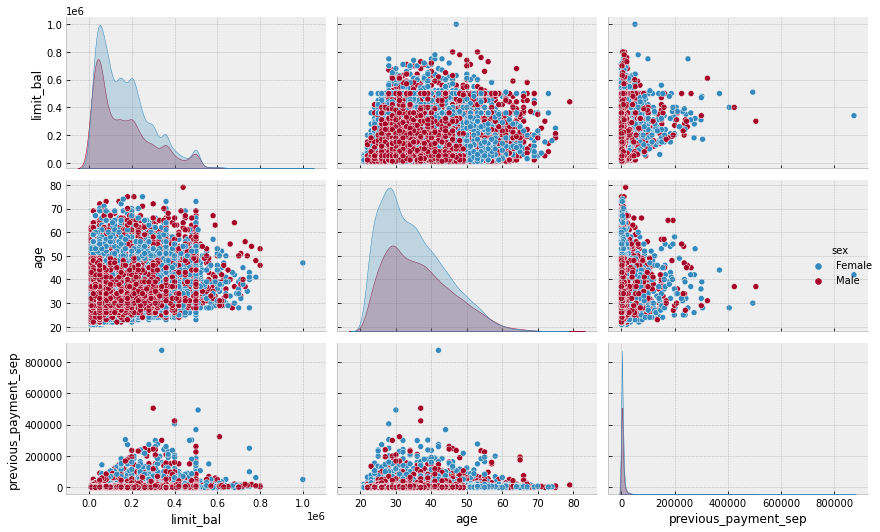

In [9]:
sns.pairplot(data=data, vars=['limit_bal', 'age', 'previous_payment_sep'],
             hue='sex', aspect=1.5)

plt.tight_layout()
plt.show()

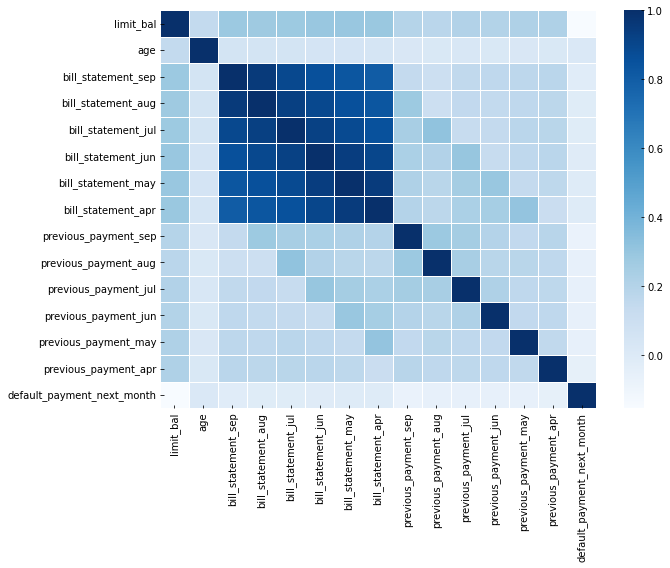

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), ax=ax, linecolor='w', linewidths=1, cmap='Blues')
plt.tight_layout()
plt.show()

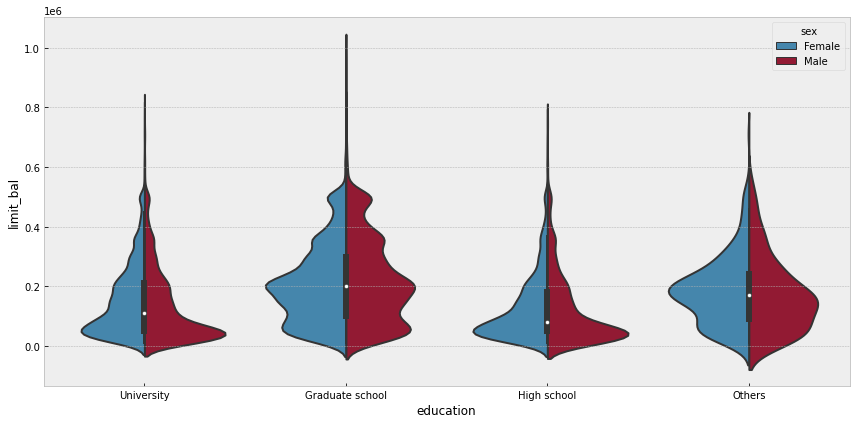

In [11]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(data=data, x='education', y='limit_bal', hue='sex', split=True, ax=ax)
plt.tight_layout()
plt.show()

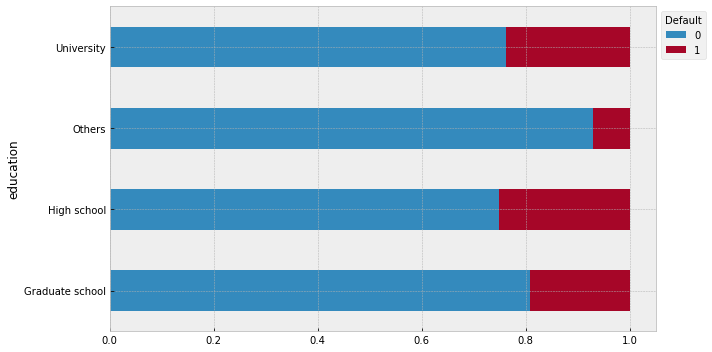

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
data.groupby('education')['default_payment_next_month']\
    .value_counts(normalize=True).unstack().plot(kind='barh', stacked=True, ax=ax)
ax.legend(title='Default', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

In [13]:
X = data.copy(deep=True)
y = X.pop('default_payment_next_month')

# split data to train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [14]:
# impute missing values

missing_num_cols = ['age']
missing_cat_cols = ['sex', 'education', 'marriage']

for col in missing_num_cols:
    num_imputer = SimpleImputer(strategy='mean')
    num_imputer.fit(X_train.loc[:, [col]])
    X_train.loc[:, col] = num_imputer.transform(X_train.loc[:,[col]])
    X_test.loc[:, col] = num_imputer.transform(X_test.loc[:, [col]])
    
for col in missing_cat_cols:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    train_col = X_train.loc[:, [col]].copy()
    test_col = X_test.loc[:, [col]].copy()
    cat_imputer.fit(train_col)
    X_train.loc[:, [col]] = cat_imputer.transform(train_col)
    X_test.loc[:, [col]] = cat_imputer.transform(test_col)

In [15]:
# transform category to one-hot

cat_cols = X_train.select_dtypes('object').columns.to_list()
one_hot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')
one_hot_transformer = ColumnTransformer([('one_hot', one_hot_encoder, cat_cols)], remainder='passthrough')
one_hot_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['sex', 'education', 'marriage',
                                  'payment_status_sep', 'payment_status_aug',
                                  'payment_status_jul', 'payment_status_jun',
                                  'payment_status_may',
                                  'payment_status_apr'])])

In [16]:
transformed_cols = one_hot_transformer.get_feature_names()
X_train = pd.DataFrame(one_hot_transformer.transform(X_train), columns=transformed_cols, index=X_train.index)
X_test = pd.DataFrame(one_hot_transformer.transform(X_test), columns=transformed_cols, index=X_test.index)

In [17]:
clf = RandomForestClassifier(max_depth=10)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [18]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [19]:
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)*100:.2f}%")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)*100:.2f}%")

Train Accuracy: 85.05%
Test Accuracy: 82.37%


Train Accuracy: 85.05%


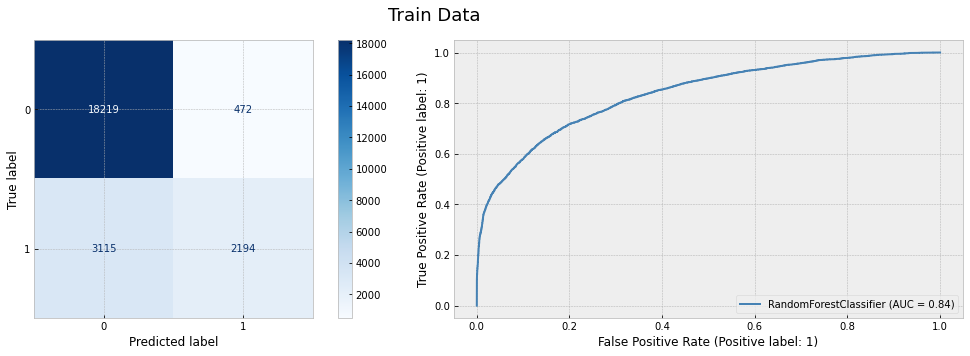

In [20]:
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)*100:.2f}%")

fig, ax = plt.subplots(1, 2, figsize=(15,5))

plot_confusion_matrix(clf, X_train, y_train, ax=ax[0], cmap='Blues')
plot_roc_curve(clf, X_train, y_train, ax=ax[1], color='steelblue')

fig.suptitle("Train Data", fontsize=18)
plt.tight_layout()
plt.show()

Test Accuracy: 82.37%


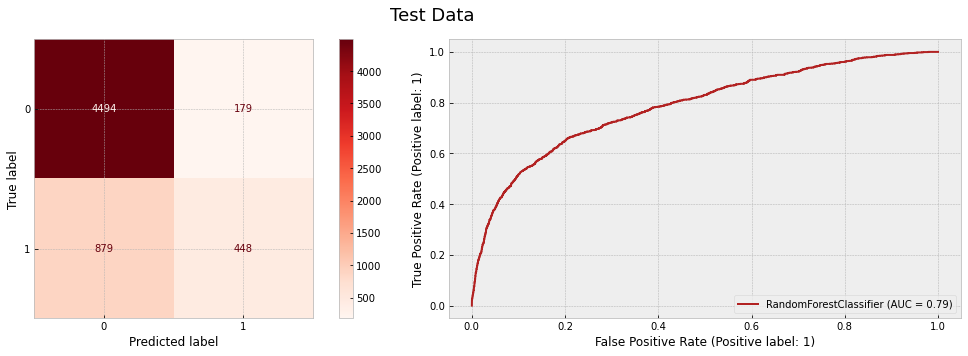

In [21]:
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)*100:.2f}%")

fig, ax = plt.subplots(1, 2, figsize=(15,5))

plot_confusion_matrix(clf, X_test, y_test, ax=ax[0], cmap='Reds')
plot_roc_curve(clf, X_test, y_test, ax=ax[1], color='firebrick')

fig.suptitle("Test Data", fontsize=18)
plt.tight_layout()
plt.show()